<a href="https://colab.research.google.com/github/shintadls/projectbased-ML-classification_boosting/blob/main/project_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing all library that necessary 

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Read the german_credit.csv

In [ ]:
df = pd.read_csv('german_credit.csv',sep=';') # sep for separating every each data by ";"

In [ ]:
df.info() # Showing what info type data value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

Showing data outlier by using boxplot


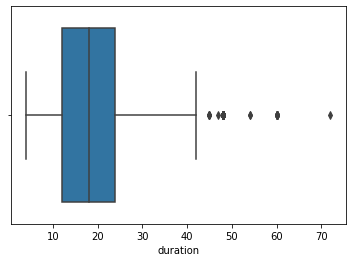

In [ ]:
sns.boxplot(x=df['duration']) 

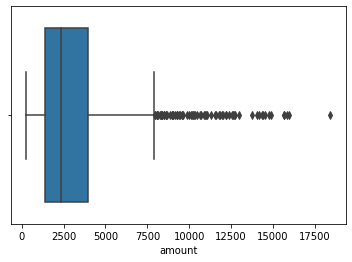

In [ ]:
sns.boxplot(x=df['amount'])

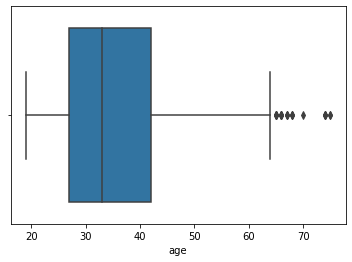

In [ ]:
sns.boxplot(x=df['age'])

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

df.shape

<ipython-input-173-9a16a617c526>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(862, 21)

Encoding One_hot

In [ ]:
# # One-hot encode the categorical columns
# df = pd.get_dummies(df, columns=['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker'])
# le = LabelEncoder()
# df['credit_risk'] = le.fit_transform(df['credit_risk'])

# # View the resulting data
# df.info()

# # Check duplicate data
# # df.duplicated().sum()

Encoding Label Encoder

In [ ]:
# X1 = df
# col = ['status', 'credit_history','purpose','savings','employment_duration', 'installment_rate','personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker','credit_risk']

# # converting the non-numeric to numeric values
# le = LabelEncoder()
# for i in col:
#   y = df[i]
#   X1[i] = le.fit_transform(X1[i])
# y = le.transform(y)

# df

Target Encoding

In [ ]:
targenc = ce.TargetEncoder()
col = ['status', 'credit_history','purpose','savings','employment_duration', 'installment_rate','personal_status_sex', 'other_debtors', 'present_residence', 'property', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']
le = LabelEncoder()
df['credit_risk'] = le.fit_transform(df['credit_risk'])
for i in col:
    df_new = targenc.fit_transform(df[i], df['credit_risk'])
    df = df_new.join(df.drop(i, axis=1))

df.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
<ipython-input-176-241cdb3073e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['credit_risk'] = le.fit_transform(df['credit_risk'])


,foreign_worker,telephone,people_liable,job,number_credits,housing,other_installment_plans,property,present_residence,other_debtors,...,installment_rate,employment_duration,savings,purpose,credit_history,status,duration,amount,age,credit_risk
0,0.727053,0.711359,0.738356,0.740143,0.719490,0.656442,0.760226,0.714953,0.755043,0.733333,...,0.689412,0.624204,0.685714,0.701149,0.849421,0.531915,18,1049,21,1
1,0.727053,0.711359,0.719697,0.740143,0.763066,0.656442,0.760226,0.795455,0.724907,0.733333,...,0.771277,0.733108,0.685714,0.639024,0.849421,0.531915,9,2799,36,1
2,0.727053,0.711359,0.738356,0.732620,0.719490,0.656442,0.760226,0.795455,0.755043,0.733333,...,0.771277,0.815068,0.720930,0.760563,0.727468,0.674528,12,841,23,1
3,0.941176,0.711359,0.719697,0.732620,0.763066,0.656442,0.760226,0.795455,0.724907,0.733333,...,0.768116,0.733108,0.685714,0.639024,0.849421,0.531915,12,2122,39,1
4,0.941176,0.711359,0.738356,0.732620,0.763066,0.761830,0.617391,0.714953,0.755043,0.733333,...,0.689412,0.733108,0.685714,0.639024,0.849421,0.531915,12,2171,38,1


Split dataset into x and y

In [ ]:
x = pd.DataFrame(df.iloc[:, :20].values) # if we use encoding label encoder or target encoder
y = df.iloc[:, 20].values

# #if we use one hot encoder
# y = df['credit_risk'] # keeping column credit_risk in y object
# column = df.columns # keep all column in column object
# x = df[[i for i in column if i != 'credit_risk']] # keep all column except credit_risk column in x object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,

MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[0.        , 1.        , 1.        , ..., 0.21052632, 0.28824688,
        0.15555556],
       [0.        , 0.        , 1.        , ..., 0.52631579, 0.17531188,
        0.46666667],
       [0.        , 0.        , 1.        , ..., 0.13157895, 0.12790545,
        0.24444444],
       ...,
       [0.        , 0.        , 1.        , ..., 0.84210526, 0.49113592,
        0.22222222],
       [0.        , 0.        , 1.        , ..., 0.52631579, 0.37019041,
        0.24444444],
       [0.        , 0.        , 0.        , ..., 0.52631579, 0.30045962,
        0.62222222]])

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.1)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

Result


In [ ]:
from sklearn.metrics import mean_squared_error

# for Train and Test Score the closer to 1 the better
print("Train Score:",model.score(x_train,y_train),"\n") 
print("Test Score:",model.score(x_test,y_test),"\n")

# finding the average of error squares between the true and the estimated values
print("Mean Squared Error:",mean_squared_error(y_test,y_pred),"\n")

# describe the model in all classess the closer to 1 the better
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Train Score: 0.7576197387518142 

Test Score: 0.7687861271676301 

Mean Squared Error: 0.23121387283236994 

Accuracy: 0.7687861271676301
